In [2]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/ACER/Desktop/train.csv', encoding = "ISO-8859-1", engine='python')
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ACER/Desktop/train.csv'

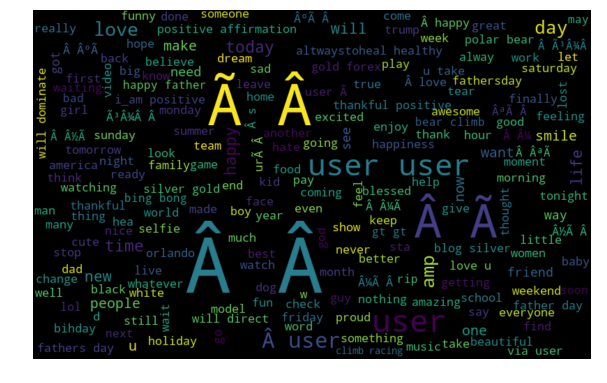

In [4]:
sentences = data['tweet'].tolist()
sentences_ss = " ".join(sentences)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(sentences_ss)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
data['cleanTweet'] = data['tweet']
data.head()

,id,label,tweet,cleanTweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
data['cleanTweet'] = data['tweet'].map(lambda x: re.sub('@\S+', ' ', x))
data.head()

,id,label,tweet,cleanTweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
#upper case to lower case
data['cleanTweet'] = data['cleanTweet'].map(lambda x: x.lower())
#remove number
data['cleanTweet'] = data['cleanTweet'].map(lambda x: re.sub(r'\d+', '', x))
#remove punctuation
data['cleanTweet'] = data['cleanTweet'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
#remove whitespace
data['cleanTweet'] = data['cleanTweet'].map(lambda x: x.strip())
#remove url
url_cleaner = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
data['cleanTweet'] = data['cleanTweet'].map(lambda x: re.sub(url_cleaner, ' ', x))
#removing small words
data['cleanTweet'] = data['cleanTweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# Replace 3 or more consecutive letters by 2 letter.
data['cleanTweet'] = data['cleanTweet'].map(lambda x: re.sub(r"(.)\1\1+", r"\1\1", x))
data

,id,label,tweet,cleanTweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant cause they dont offer ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.Ã°Â...,next school year year exams cant think about t...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [8]:
#Tokenization
tokenized_tweet = data['cleanTweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cant, cause, they, dont...
2                              [bihday, your, majesty]
3                      [model, love, take, with, time]
4                    [factsguide, society, motivation]
Name: cleanTweet, dtype: object

In [10]:
# Removing stop words
stop_words = set(stopwords.words('english'))
tokenized_tweet = tokenized_tweet.apply(lambda text: [word for word in text if word not in stop_words])
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, cant, cause, dont, offe...
2                                    [bihday, majesty]
3                            [model, love, take, time]
4                    [factsguide, society, motivation]
Name: cleanTweet, dtype: object

In [11]:
# stemming
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0     [father, dysfunct, selfish, drag, kid, dysfunct]
1    [thank, lyft, credit, cant, caus, dont, offer,...
2                                    [bihday, majesti]
3                            [model, love, take, time]
4                          [factsguid, societi, motiv]
Name: cleanTweet, dtype: object

In [14]:
# Lemmatizing the words using WordNet
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    # pos_tagged_text = text.apply(lambda x: nltk.pos_tag(x))
    return [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]

tokenized_tweet = tokenized_tweet.apply(lambda text: lemmatize_words(text))
tokenized_tweet.head()

0     [father, dysfunct, selfish, drag, kid, dysfunct]
1    [thank, lyft, credit, cant, caus, dont, offer,...
2                                    [bihday, majesti]
3                            [model, love, take, time]
4                          [factsguid, societi, motiv]
Name: cleanTweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['cleanTweet'] = tokenized_tweet

In [1]:
all_words = ' '.join([text for text in data['cleanTweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'data' is not defined

In [17]:
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [21]:
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 1 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 8       # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(data['cleanTweet'],workers=num_workers,size=num_features,min_count=min_word_count,window=context,sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "word2vec"
model.save(model_name)

2021-01-17 13:37:59,726 : INFO : collecting all words and their counts
2021-01-17 13:37:59,730 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2021-01-17 13:37:59,732 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-17 13:37:59,834 : INFO : PROGRESS: at sentence #10000, processed 445069 words, keeping 27 word types


Training model....


2021-01-17 13:37:59,950 : INFO : PROGRESS: at sentence #20000, processed 883221 words, keeping 27 word types
2021-01-17 13:38:00,119 : INFO : PROGRESS: at sentence #30000, processed 1323685 words, keeping 27 word types
2021-01-17 13:38:00,141 : INFO : collected 27 word types from a corpus of 1410506 raw words and 31962 sentences
2021-01-17 13:38:00,143 : INFO : Loading a fresh vocabulary
2021-01-17 13:38:00,144 : INFO : effective_min_count=1 retains 27 unique words (100% of original 27, drops 0)
2021-01-17 13:38:00,145 : INFO : effective_min_count=1 leaves 1410506 word corpus (100% of original 1410506, drops 0)
2021-01-17 13:38:00,147 : INFO : deleting the raw counts dictionary of 27 items
2021-01-17 13:38:00,147 : INFO : sample=0.001 downsamples 23 most-common words
2021-01-17 13:38:00,148 : INFO : downsampling leaves estimated 245742 word corpus (17.4% of prior 1410506)
2021-01-17 13:38:00,149 : INFO : estimated required memory for 27 words and 300 dimensions: 78300 bytes
2021-01-17 

In [22]:
model.wv.most_similar("father")

KeyError: "word 'father' not in vocabulary"